In [2]:
# code here
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

Número de células: 2435


Text(0.5, 1.0, 'Região "desconhecida"')

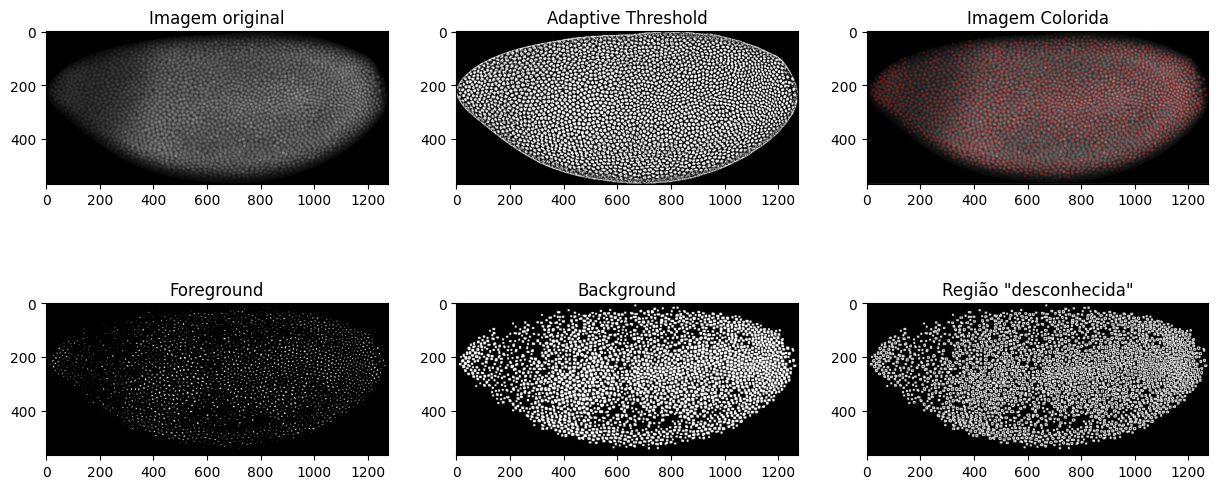

In [3]:
img = cv.imread("image.jpg", cv.IMREAD_GRAYSCALE)

thresh = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,0)



# noise removal
kernel = np.ones((3,3),np.uint8)
sure_fg = cv.erode(thresh,kernel=kernel,iterations=2)
# sure background area
sure_bg = cv.dilate(sure_fg,kernel,iterations=3)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
print(f'Número de células: {len(np.unique(markers))-1}')
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

imgColorida = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
markers = cv.watershed(imgColorida,markers)
imgColorida[markers == -1] = [255,0,0]


figura = plt.figure(figsize = (15,10))

figura.add_subplot(3,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem original')

figura.add_subplot(3,3,2)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title(f'Adaptive Threshold')

figura.add_subplot(3,3,3)
plt.imshow(imgColorida, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Colorida')

figura.add_subplot(3,3,4)
plt.imshow(sure_fg, cmap='gray', vmin=0, vmax=255)
plt.title(f'Foreground')

figura.add_subplot(3,3,5)
plt.imshow(sure_bg, cmap='gray', vmin=0, vmax=255)
plt.title(f'Background')

figura.add_subplot(3,3,6)
plt.imshow(unknown, cmap='gray', vmin=0, vmax=255)
plt.title(f'Região "desconhecida"')


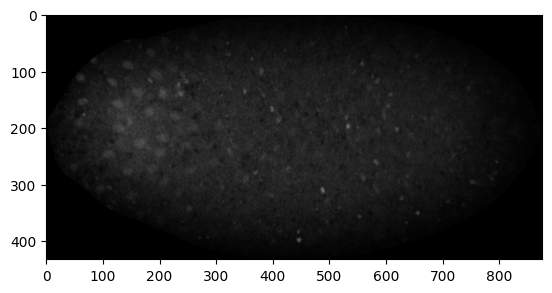

In [18]:
img2 = cv.imread("image2.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

Número de Feijões: 56


Text(0.5, 1.0, 'Região "desconhecida"')

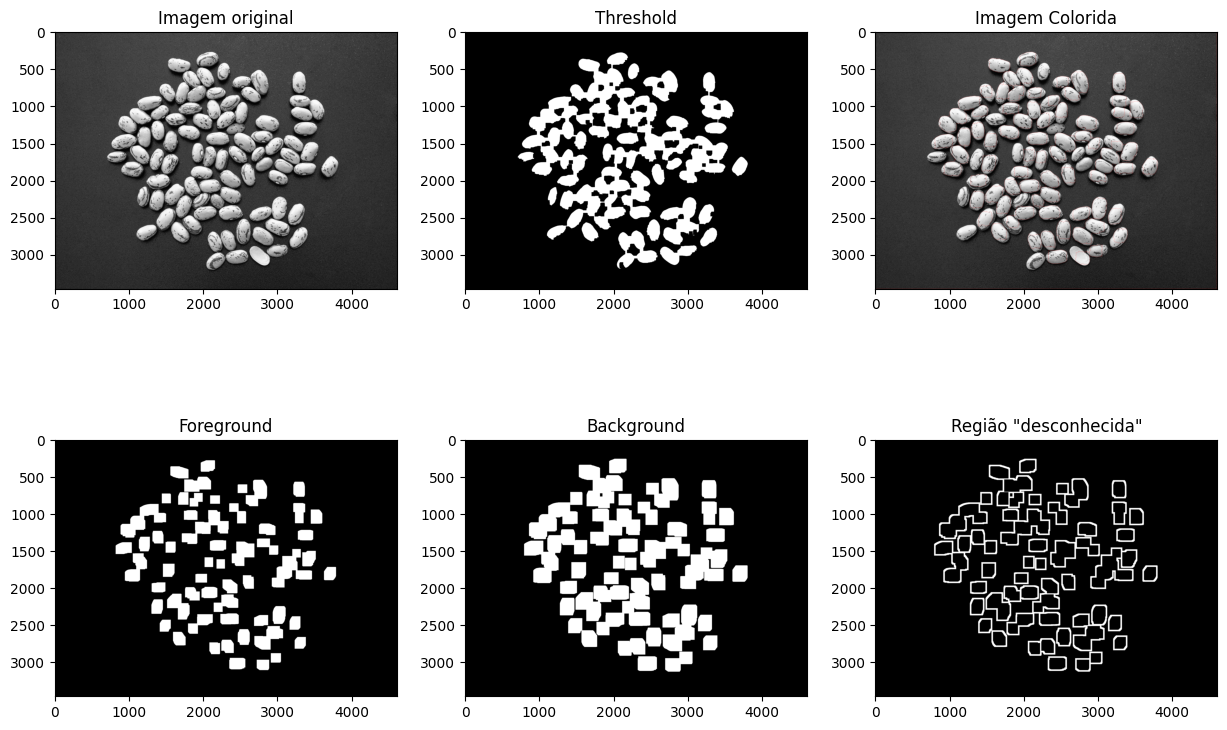

In [71]:
img = cv.imread("feijao.jpg", cv.IMREAD_GRAYSCALE)


kernel = np.ones((3,3),np.uint8)
filter = cv.medianBlur(img,11)
filter = cv.erode(filter,kernel=kernel,iterations=3)
filter = cv.dilate(filter,kernel=kernel,iterations=3)

#thresh = cv.adaptiveThreshold(filter,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,0)
ret, thresh = cv.threshold(filter,100,255,cv.THRESH_BINARY)

kernel = np.ones((15,15),np.uint8)
thresh = cv.erode(thresh,kernel=kernel,iterations=1)
thresh = cv.morphologyEx(thresh,cv.MORPH_CLOSE,kernel,iterations=3)
#thresh = cv.dilate(thresh,kernel=kernel,iterations=1)

# noise removal
kernel = np.ones((15,15),np.uint8)
sure_fg = cv.erode(thresh,kernel,iterations=8)
sure_fg = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel,iterations=8)
# sure background area
sure_bg = cv.dilate(sure_fg,kernel,iterations=3)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
print(f'Número de Feijões: {len(np.unique(markers))-1}')
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

imgColorida = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
markers = cv.watershed(imgColorida,markers)
imgColorida[markers == -1] = [255,0,0]


figura = plt.figure(figsize = (15,15))

figura.add_subplot(3,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem original')

figura.add_subplot(3,3,2)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title(f'Threshold')

figura.add_subplot(3,3,3)
plt.imshow(imgColorida, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Colorida')

figura.add_subplot(3,3,4)
plt.imshow(sure_fg, cmap='gray', vmin=0, vmax=255)
plt.title(f'Foreground')

figura.add_subplot(3,3,5)
plt.imshow(sure_bg, cmap='gray', vmin=0, vmax=255)
plt.title(f'Background')

figura.add_subplot(3,3,6)
plt.imshow(unknown, cmap='gray', vmin=0, vmax=255)
plt.title(f'Região "desconhecida"')